# check a sample
Alexis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import sys
sys.path.append("../")

from freq_allocation.yield_mc_simulation import *
from freq_allocation.frequency_graph import FrequencyGraph
from freq_allocation.optimization import layout_optimizer

# silencing pyomo wanring
import logging

logging.getLogger('pyomo.core').setLevel(logging.ERROR)

# import pandas as pd

In [2]:
params = {
    'axes.labelsize': 18,
    'legend.fontsize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'text.usetex': True,
    'figure.figsize': [7, 3.375],
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'ytick.right': True,
    'xtick.top': True
   }
plt.rcParams.update(params)

In [3]:
N = 8  # number of transmons
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (5, 4), (6, 5), (7, 6), (0, 7)]  # edges
architecture = "CR"  # choosing the architecture: CZ or CR
cz = True if architecture=='CZ' else False
qutrit = True # qutrit or qubits

# for later:
# thresholds
# weights
all_differents = False
# solver name

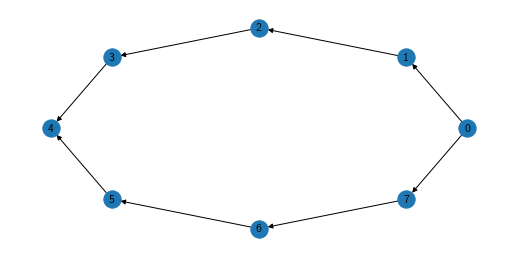

In [4]:
G = FrequencyGraph(edges=edges, architecture=architecture)
pos = {i: (np.cos(2*np.pi/N*i), (np.sin(2*np.pi/N*i))) for i in range(N)}
G.plot(pos = pos)

In [5]:
#thresholds
if architecture == 'CR' and not qutrit:
    d = np.array([0.017, 0.03 , 0.03 , 0.017, 0.03 , 0.002, 0.017, 0.025, 0.017])
    keys = ['A1', 'A2i', 'A2j', "E1", "E2", "E4", "F1", "F2", "M1"]
    d_dict = { k: dd for (k, dd) in zip(keys, d)}
    cr_keys = ['A1', 'A2i', 'A2j', "E1", "E2", "E4","C1", "C1b", "F1", "F2", "M1"]
    cstr_key = cr_keys

#CZ constraints
elif architecture == 'CZ':
    keys = ['A1', 'A2i', 'A2j', "E1", "E2", "E4", "E1t", "E2t", "E4t", "F1", "F2", "M1"]
    d = np.array([0.017, 0.03 , 0.03 , 0.017, 0.03 , 0.002, 0.017, 0.03 , 0.002, 0.017, 0.025, 0.017])
    d_dict = { k: dd for (k, dd) in zip(keys, d)}
    cstr_key = keys

elif (architecture == 'CR') and qutrit:
    d_dict = {'A1': 0.017,
              'A2i': 0.03,
              'A2j': 0.03,
              'A3i': 0.03,
              'A3j': 0.03,
              "E1": 0.017,
              "E2": 0.03,
              "E3": 0.03,
              "E4":0.002,
              "F1": 0.017,
              "F2":0.025,
              "F3": 0.025,
              "M1": 0.017}
    cr_keys = ['A1', 'A2i', 'A2j','A3i', 'A3j', "E1", "E2","E3", "E4",
               "C1", "C1b", "F1", "F2","F3",  "M1"]
    cstr_key = cr_keys
    
    
    
# free of drive
# keys = ['A1', 'A2i', 'A2j', "E1", "E2", "E4", "E1t", "E2t", "E4t", "F1", "F2", "M1"]
# d = np.array([0.017, 0.03 , 0.03 , 0.00, 0.00 , 0.000, 0.00, 0.00 , 0.000, 0.00, 0.00, 0.00])
# d_dict = { k: dd for (k, dd) in zip(keys, d)}
# cstr_key = keys

In [6]:
# # manually adding the frequencyes and the drives
# freqs = np.array([ 5.63, 5.55, 5.40, 5.25, 5.05, 5.15, 5.3, 5.43])
freqs = np.array([ 5.794, 5.659, 5.47, 5.297, 5.115, 5.240, 5.421, 5.603])
freqs = {k: freqs[k] for k in range(8)}
anharms = {k: -0.27 for k in range(8)}
drives =  {e: freqs[e[1]] for e in G.edges}
G.set_values(freqs, anharms, drives)

print(G.check_solution(d_dict, cstr=cstr_key))

The drive frequency are CR compatible
E4 at (0, 1)
(['A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A2i', 'A2i', 'A2i', 'A2i', 'A2i', 'A2i', 'A2i', 'A2i', 'A2j', 'A2j', 'A2j', 'A2j', 'A2j', 'A2j', 'A2j', 'A2j', 'A3i', 'A3i', 'A3i', 'A3i', 'A3i', 'A3i', 'A3i', 'A3i', 'A3j', 'A3j', 'A3j', 'A3j', 'A3j', 'A3j', 'A3j', 'A3j', 'E1', 'E1', 'E1', 'E1', 'E1', 'E1', 'E1', 'E1', 'E2', 'E2', 'E2', 'E2', 'E2', 'E2', 'E2', 'E2', 'E3', 'E3', 'E3', 'E3', 'E3', 'E3', 'E3', 'E3', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1b', 'C1b', 'C1b', 'C1b', 'C1b', 'C1b', 'C1b', 'C1b', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F2', 'F2', 'F2', 'F2', 'F2', 'F2', 'F2', 'F2', 'F3', 'F3', 'F3', 'F3', 'F3', 'F3', 'F3', 'F3', 'M1', 'M1', 'M1', 'M1', 'M1', 'M1', 'M1', 'M1'], [(0, 1), (0, 7), (1, 2), (2, 3), (3, 4), (5, 4), (6, 5), (7, 6), (0, 1), (0, 7), (1, 2), (2, 3), (3, 4), (5, 4), (6, 5), (7, 6), (0, 1), (0, 7), (1, 2), (2, 3), (3, 4), (5, 4), (6, 5), (

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("frequencies.csv")

In [9]:
df

,X,Y,Sample,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,1,1,8QRing V7,5.681684,5.403459,5.222051,5.434713,5.620182,5.771832,6.037156,6.018465
1,1,2,8QRing V7,5.888125,5.533409,5.254282,5.322629,5.545814,5.513402,6.030694,5.908212
2,1,3,CZ,5.456476,5.332916,4.948693,5.205242,5.337139,5.706665,5.932805,6.031981
3,1,4,8QRing V7,5.777590,5.177243,5.203923,5.247975,5.079274,5.047243,5.568749,5.227390
4,1,5,CZ,5.491560,5.430288,5.080103,5.307762,5.103431,NaN,5.625017,5.518514
...,...,...,...,...,...,...,...,...,...,...,...
59,8,4,8QRing V7,5.925397,4.586983,5.364082,5.635800,5.599886,5.795541,5.958287,5.891156
60,8,5,8QRing V7,5.852062,5.532380,5.397166,5.268319,5.539605,5.950175,6.122861,NaN
61,8,6,8QRing V7,5.440627,5.495102,5.292079,5.532894,5.587165,5.803695,5.968942,5.976489
62,8,7,8QRing V7,5.640670,5.309615,5.254733,5.418538,5.649353,5.806027,5.932805,5.955164


In [10]:
single_key = ['A1', 'A2i', 'A2j','A3i', 'A3j']

In [12]:
col_df = pd.DataFrame()

for index, row in df.iterrows():
    G = FrequencyGraph(edges=edges, architecture=architecture)
    freqs = np.array([row[f'Q{i}'] for i in range(8)])
    freqs = {k: freqs[k] for k in range(8)}
    anharms = {k: -0.29 for k in range(8)}
    drives =  {e: freqs[e[1]] for e in G.edges}
    G.set_values(freqs, anharms, drives)
    
    # testing all the constraints
#     r = G.check_solution(d_dict, cstr=cstr_key, verbose = False)
    
    # testing only the single transmon constraints
    r = G.check_solution(d_dict, cstr=single_key, verbose = False, qutrit=qutrit)
    rdf = pd.DataFrame({"type":r[0], "indexes": r[1], "value": r[-1]})
    rdf["name"] = f"X{row['X']:02}Y{row['Y']:02}"
    col_df = col_df.append(rdf)
    

The drive frequency are CR compatible
The drive frequency are CR compatible
The drive frequency are CR compatible
The drive frequency are CR compatible
The edge (6, 5) is not a CR edge
The drive frequency are CR compatible
The drive frequency are CR compatible
The drive frequency are CR compatible
The edge (6, 5) is not a CR edge
The drive frequency are CR compatible
The edge (7, 6) is not a CR edge
The drive frequency are CR compatible
The drive frequency are CR compatible
The drive frequency are CR compatible
The drive frequency are CR compatible
The drive frequency are CR compatible
The drive frequency are CR compatible
The drive frequency are CR compatible
The drive frequency are CR compatible
The drive frequency are CR compatible
The edge (2, 3) is not a CR edge
The edge (0, 1) is not a CR edge
The drive frequency are CR compatible
The edge (0, 7) is not a CR edge
The drive frequency are CR compatible
The drive frequency are CR compatible
The edge (0, 1) is not a CR edge
The drive

In [15]:
r

(['A1',
  'A1',
  'A1',
  'A1',
  'A1',
  'A1',
  'A1',
  'A1',
  'A2i',
  'A2i',
  'A2i',
  'A2i',
  'A2i',
  'A2i',
  'A2i',
  'A2i',
  'A2j',
  'A2j',
  'A2j',
  'A2j',
  'A2j',
  'A2j',
  'A2j',
  'A2j',
  'A3i',
  'A3i',
  'A3i',
  'A3i',
  'A3i',
  'A3i',
  'A3i',
  'A3i',
  'A3j',
  'A3j',
  'A3j',
  'A3j',
  'A3j',
  'A3j',
  'A3j',
  'A3j'],
 [(0, 1),
  (0, 7),
  (1, 2),
  (2, 3),
  (3, 4),
  (5, 4),
  (6, 5),
  (7, 6),
  (0, 1),
  (0, 7),
  (1, 2),
  (2, 3),
  (3, 4),
  (5, 4),
  (6, 5),
  (7, 6),
  (0, 1),
  (0, 7),
  (1, 2),
  (2, 3),
  (3, 4),
  (5, 4),
  (6, 5),
  (7, 6),
  (0, 1),
  (0, 7),
  (1, 2),
  (2, 3),
  (3, 4),
  (5, 4),
  (6, 5),
  (7, 6),
  (0, 1),
  (0, 7),
  (1, 2),
  (2, 3),
  (3, 4),
  (5, 4),
  (6, 5),
  (7, 6)],
 array([False, False, False, False,  True, False, False,  True, False,
        False, False, False,  True, False, False,  True, False, False,
        False, False,  True, False, False,  True, False, False, False,
        False,  True, False, Fals

In [13]:
import seaborn as sns
import itertools


<ipython-input-14-d810a7114cc7>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (16, 8))


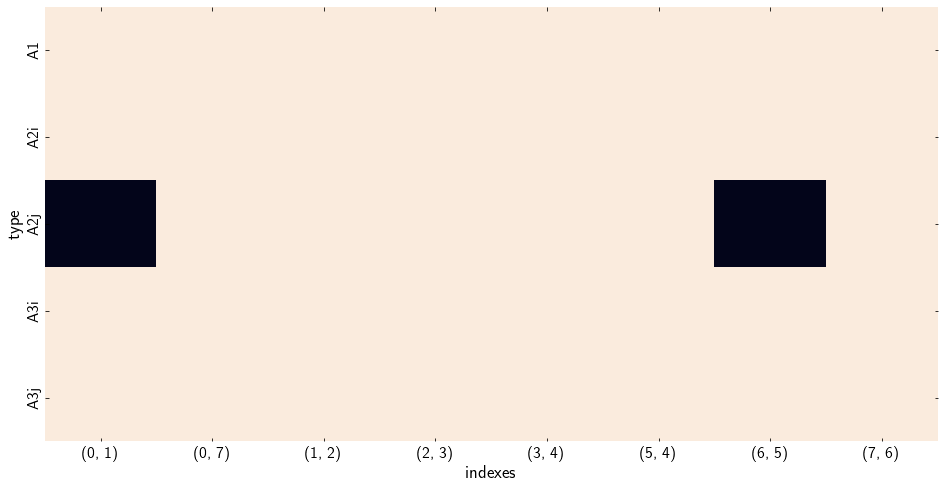

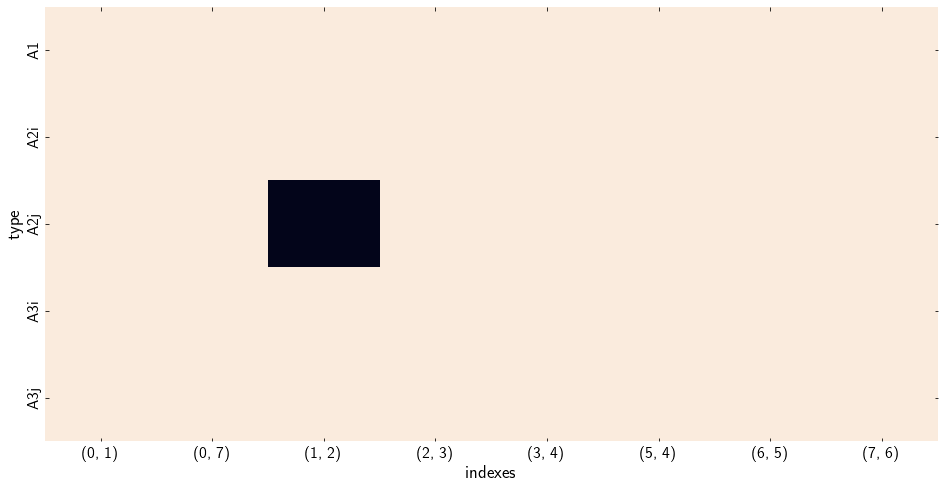

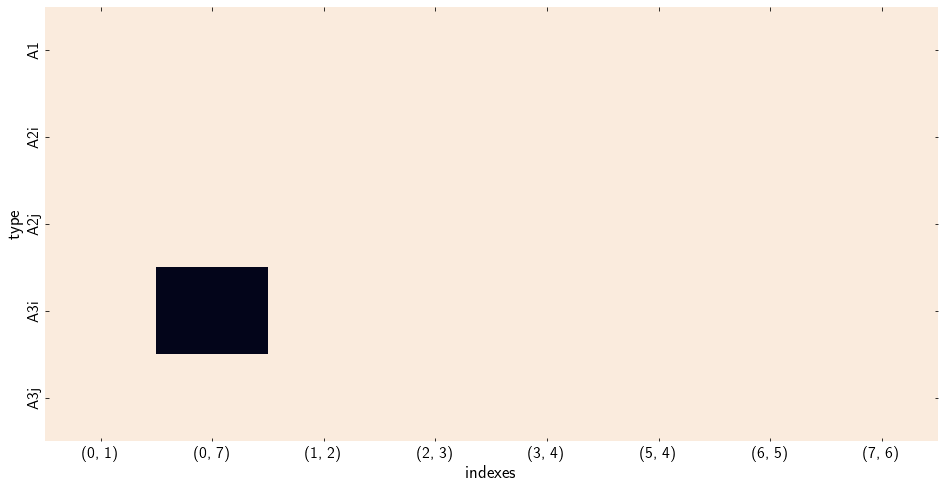

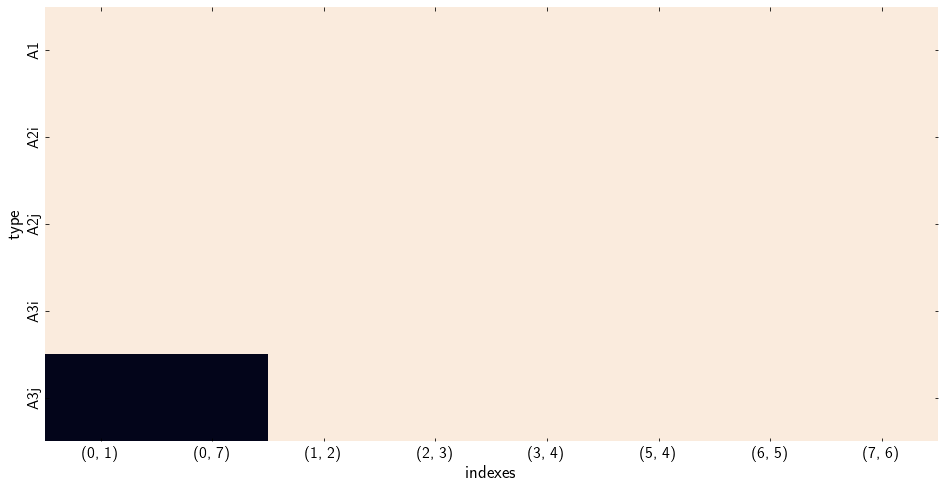

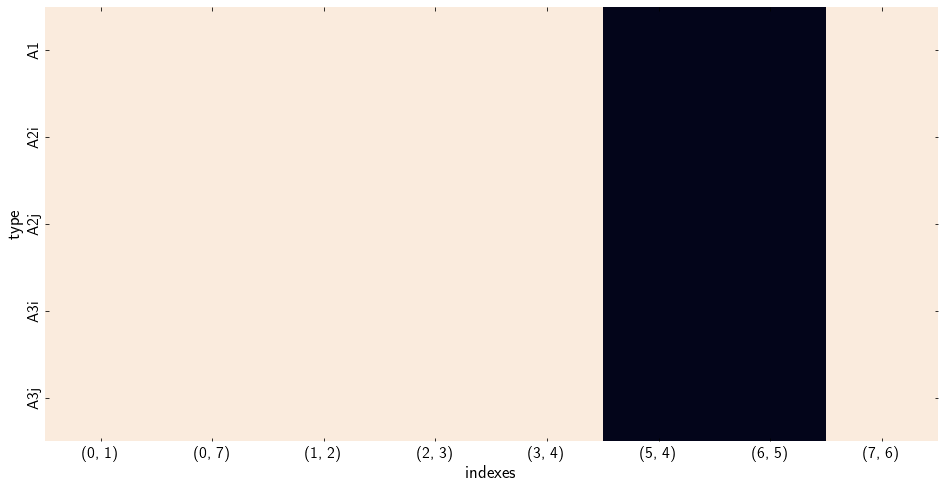

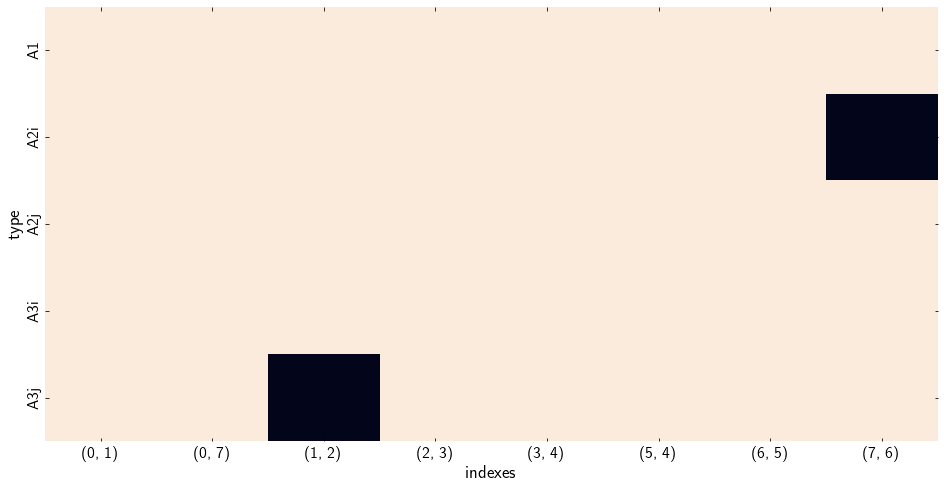

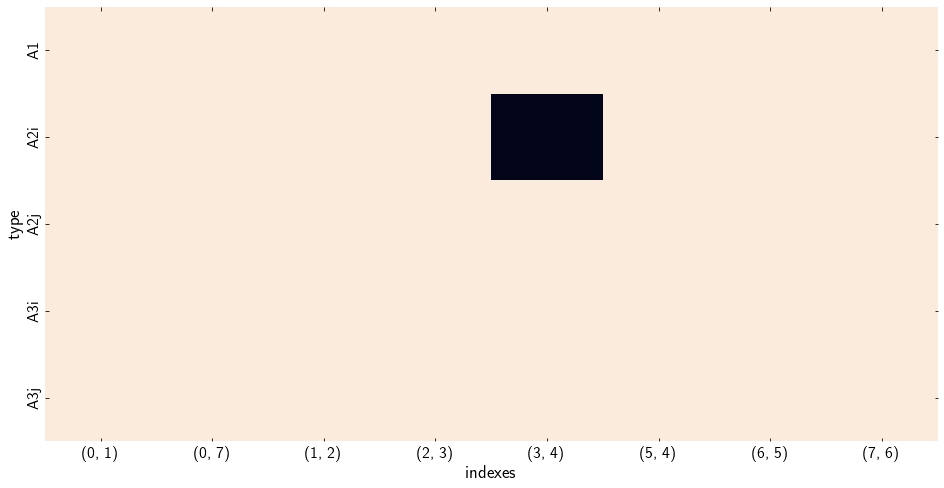

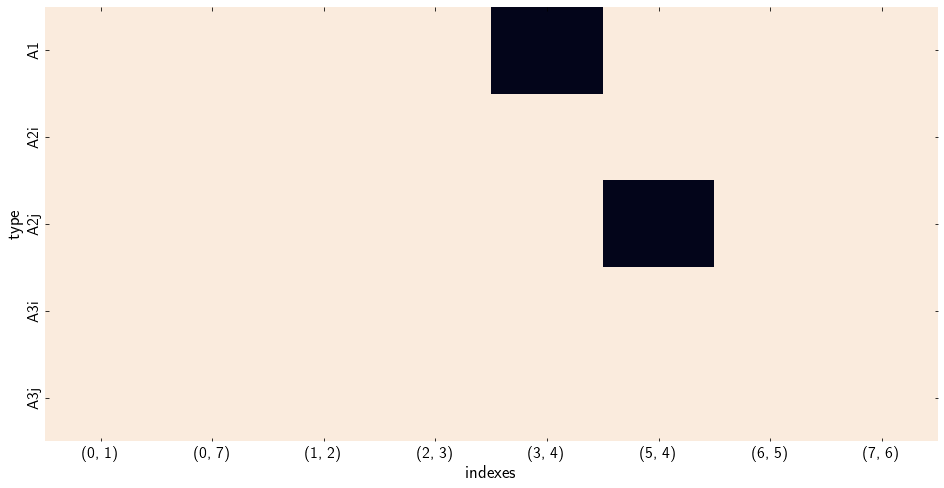

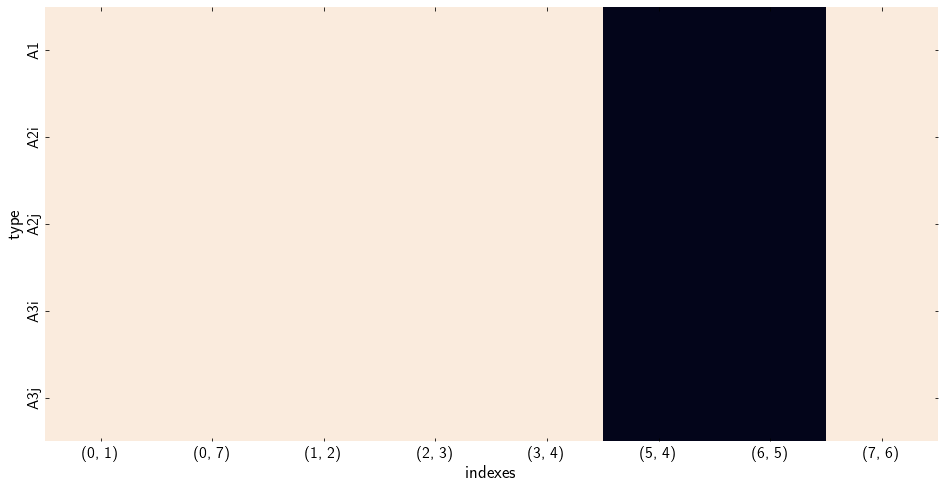

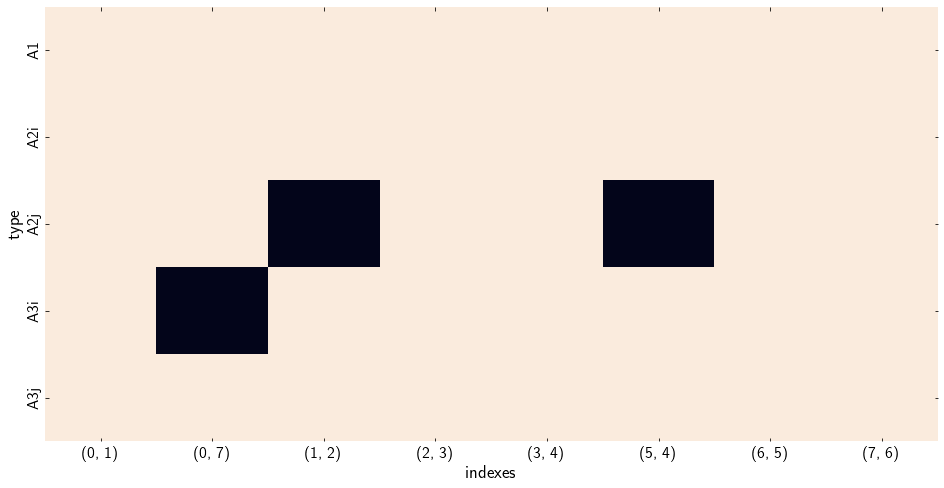

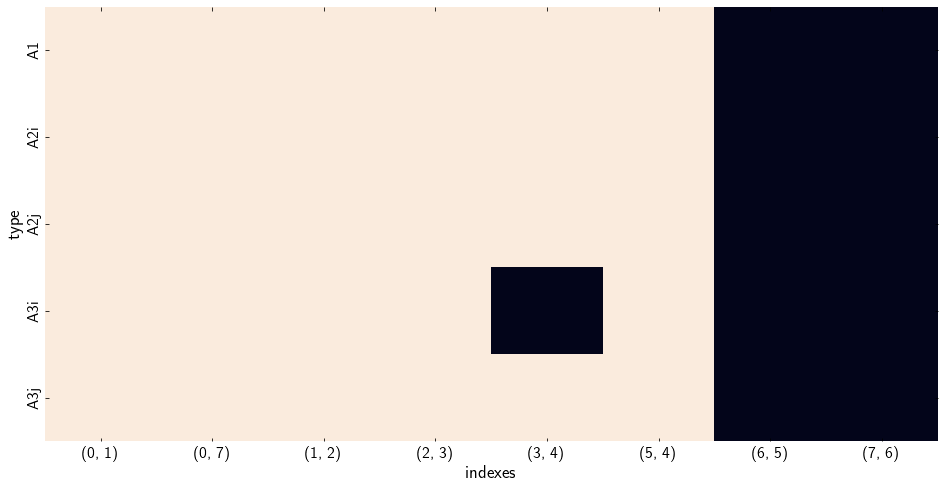

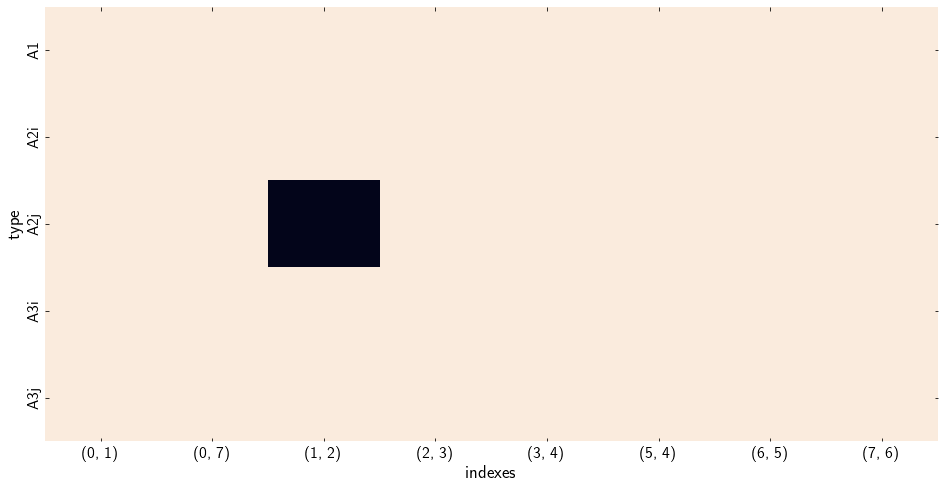

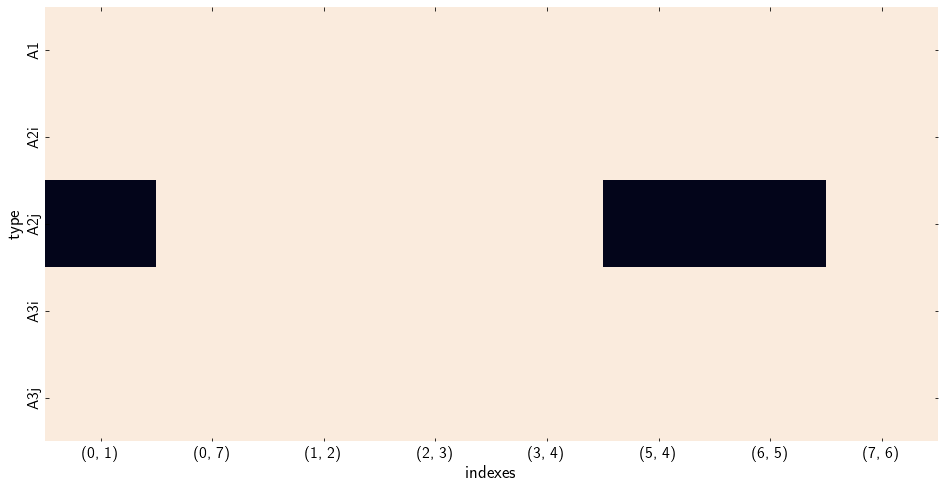

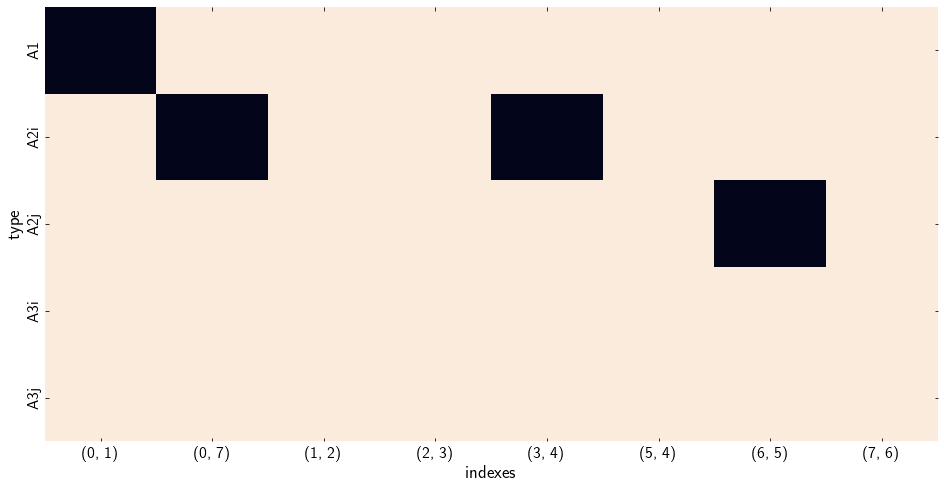

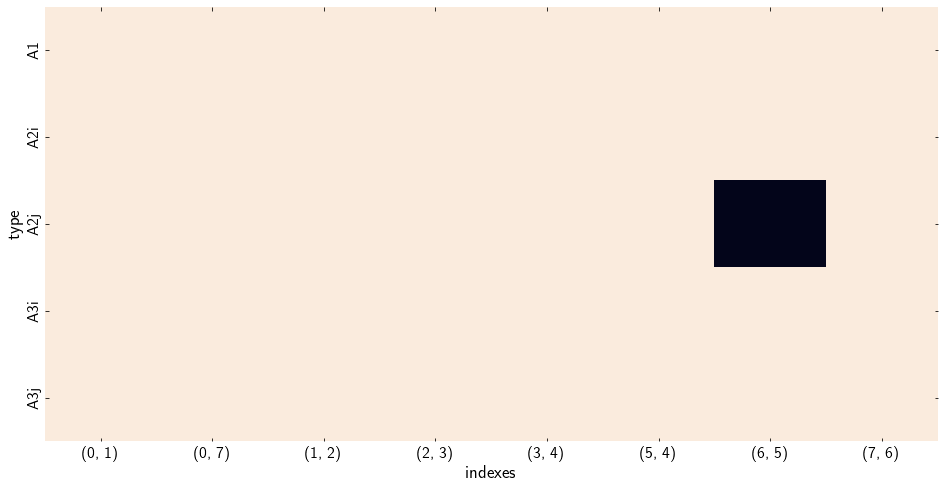

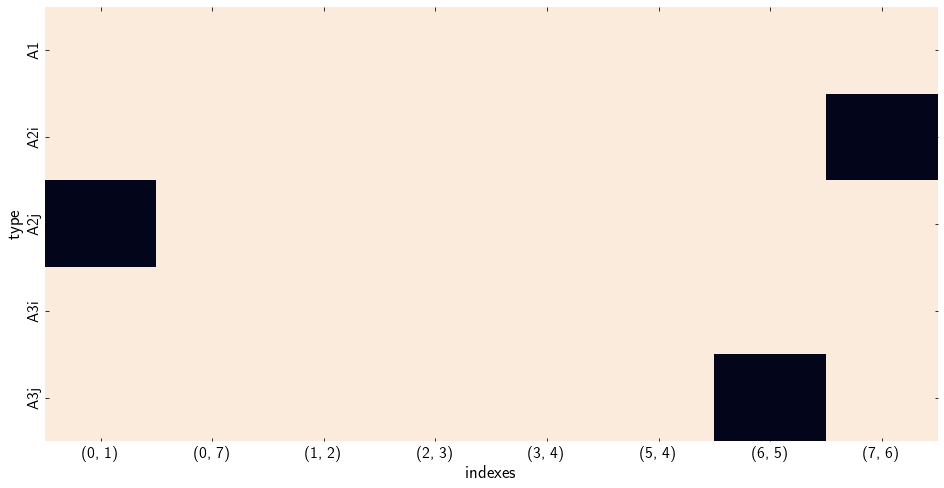

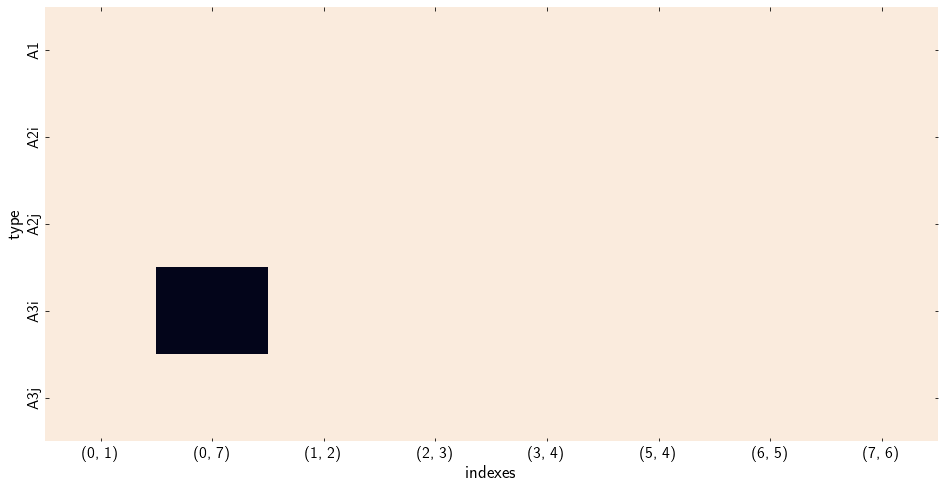

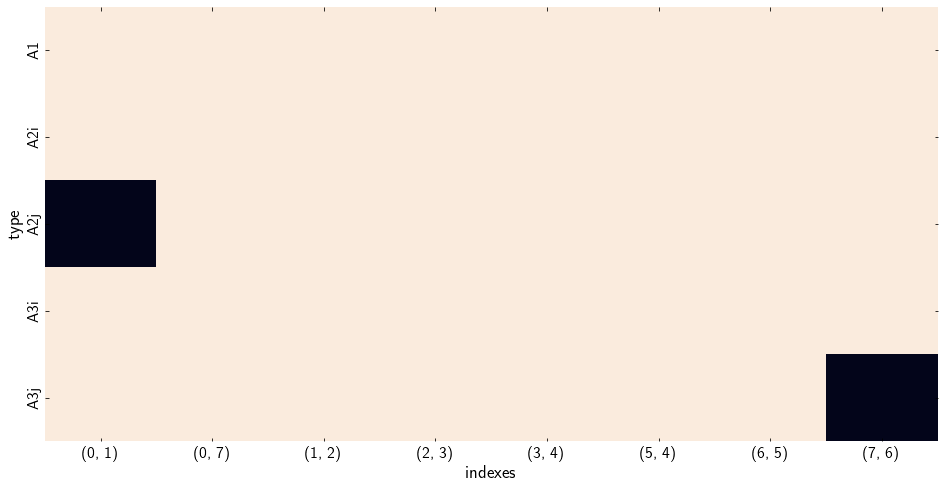

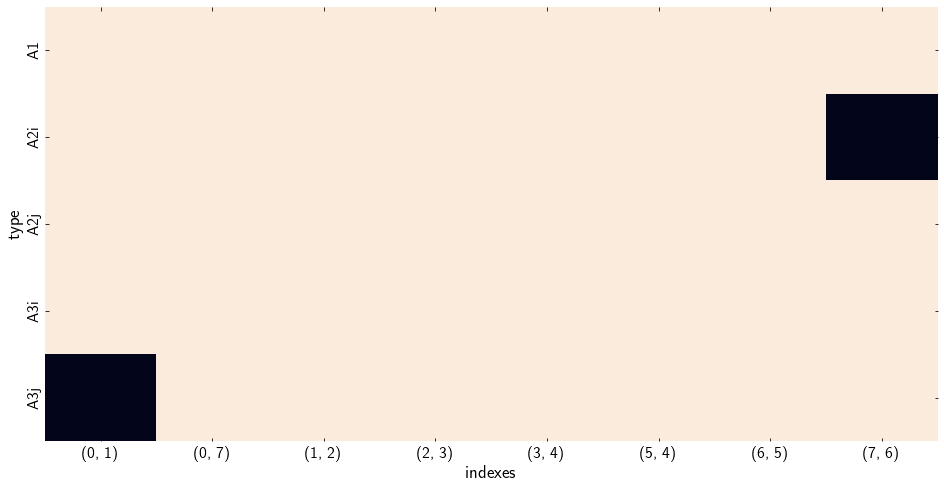

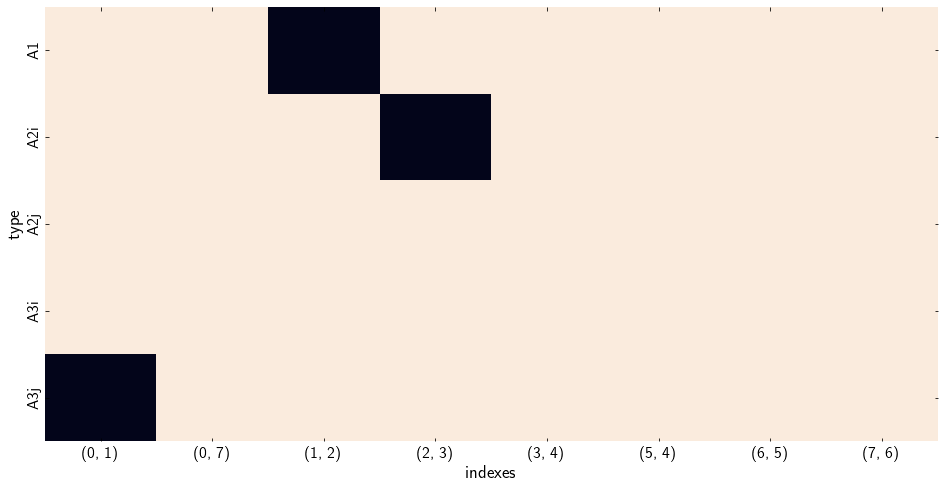

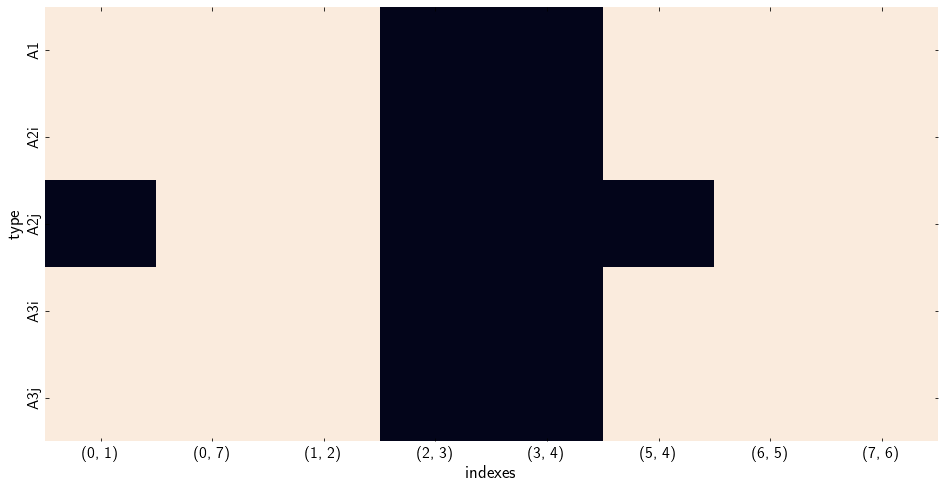

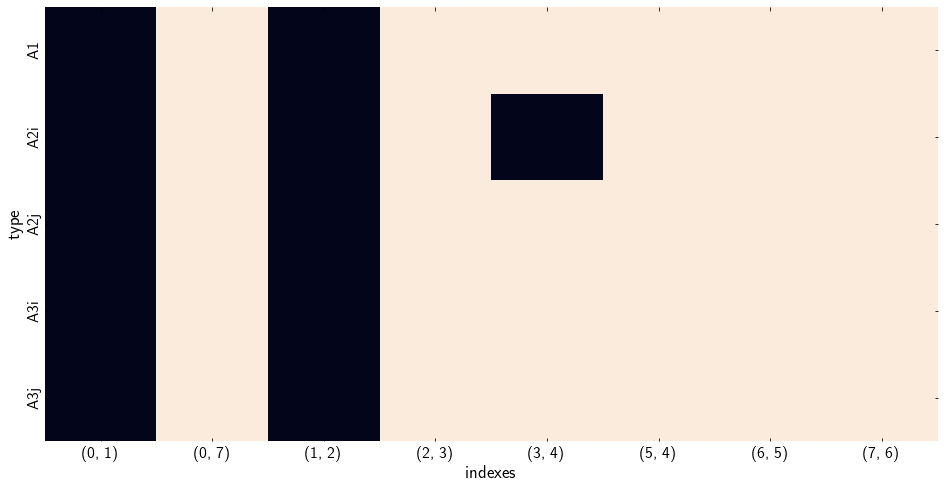

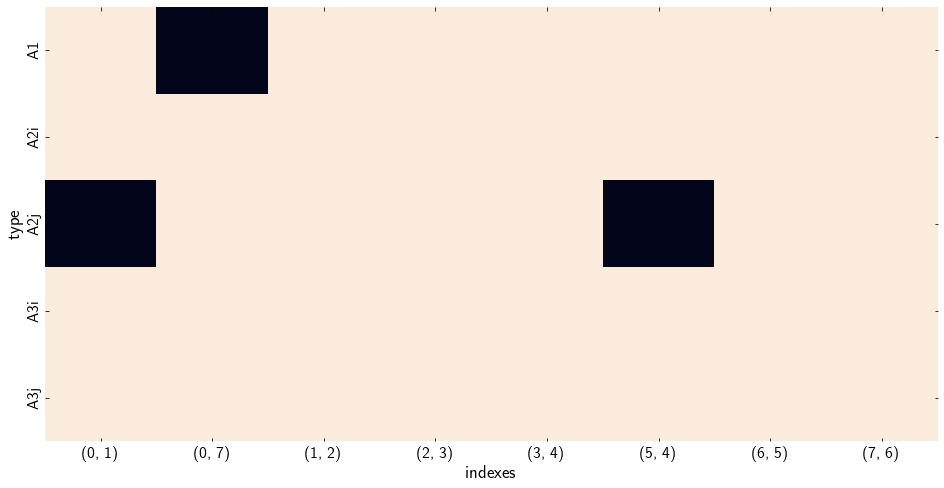

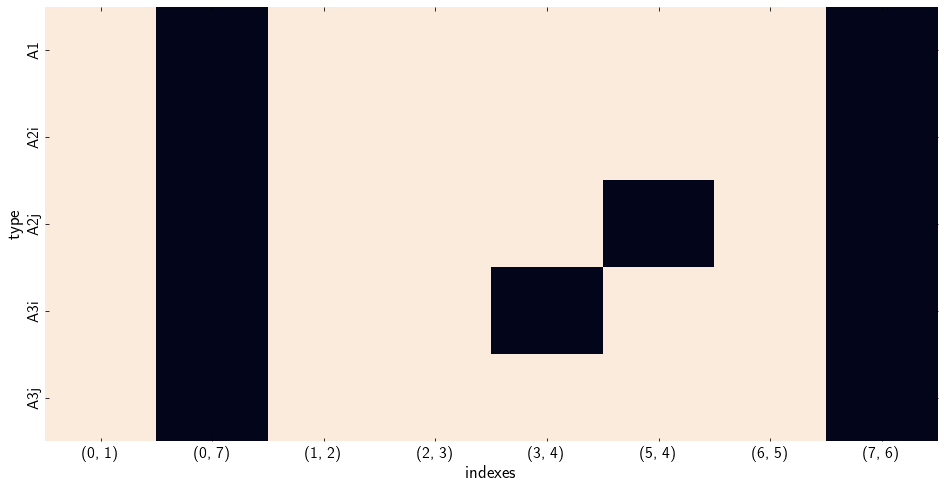

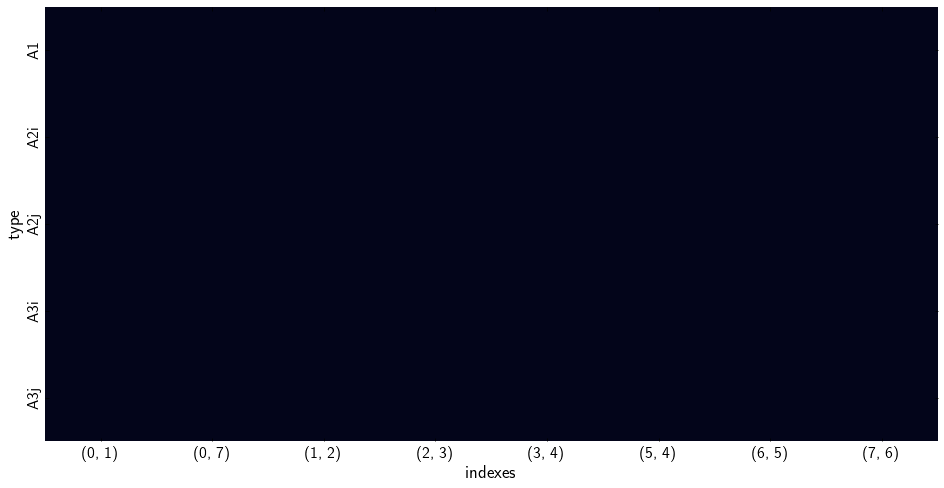

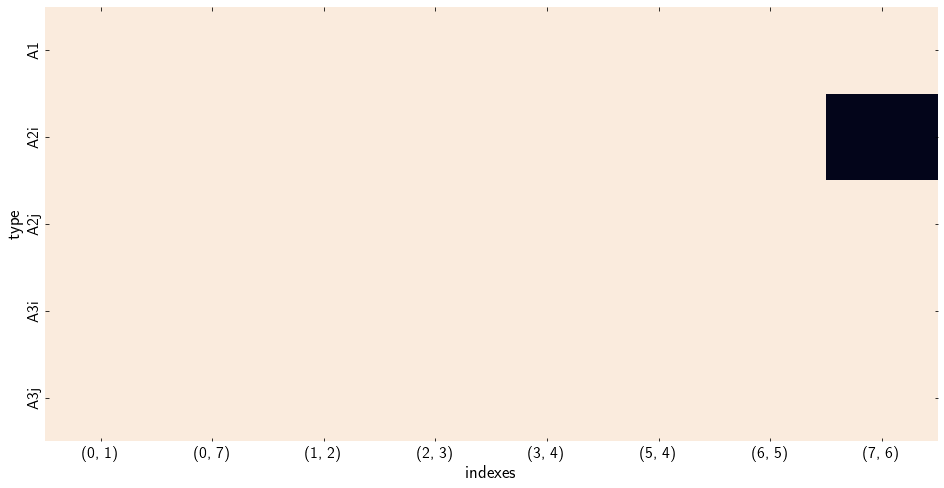

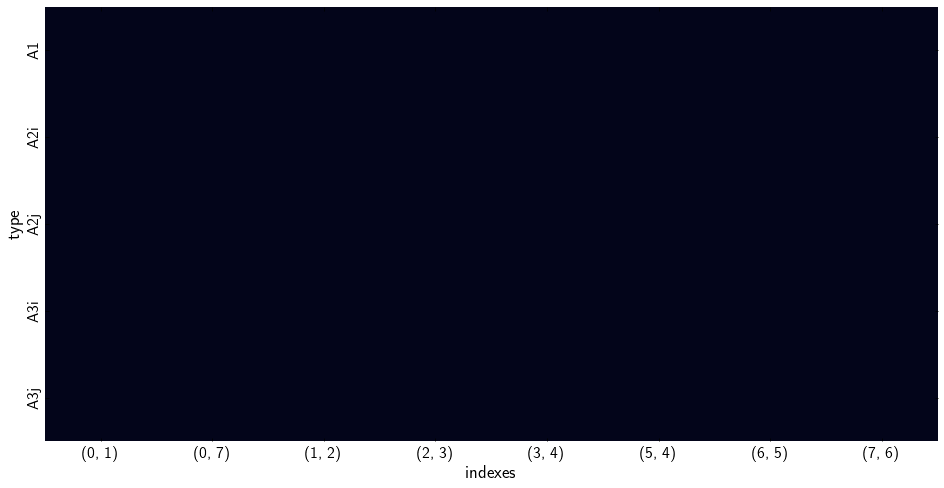

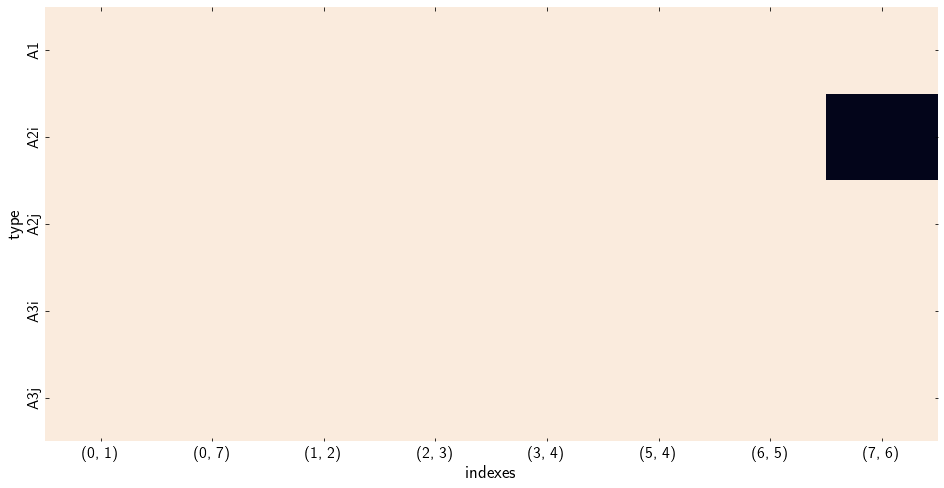

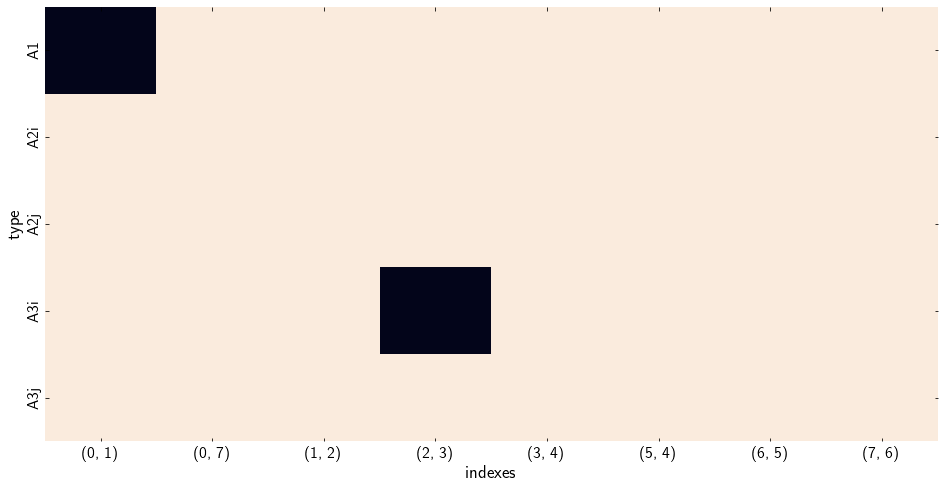

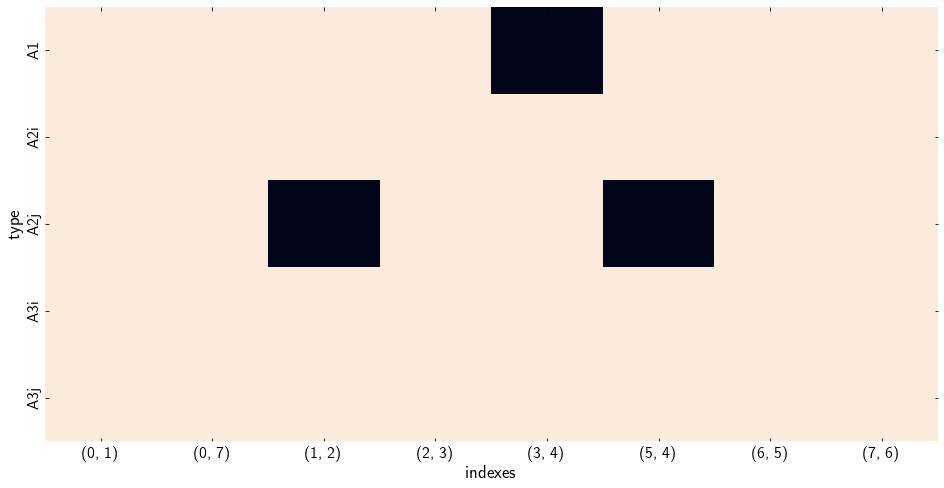

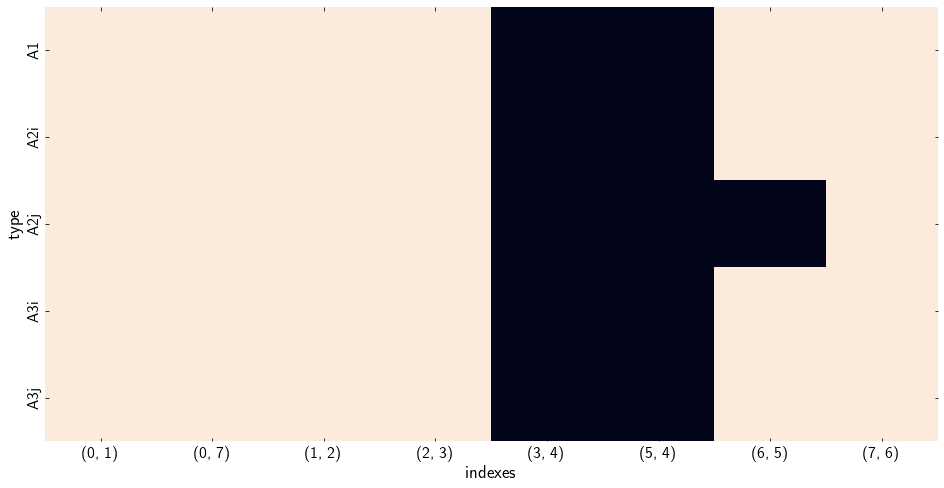

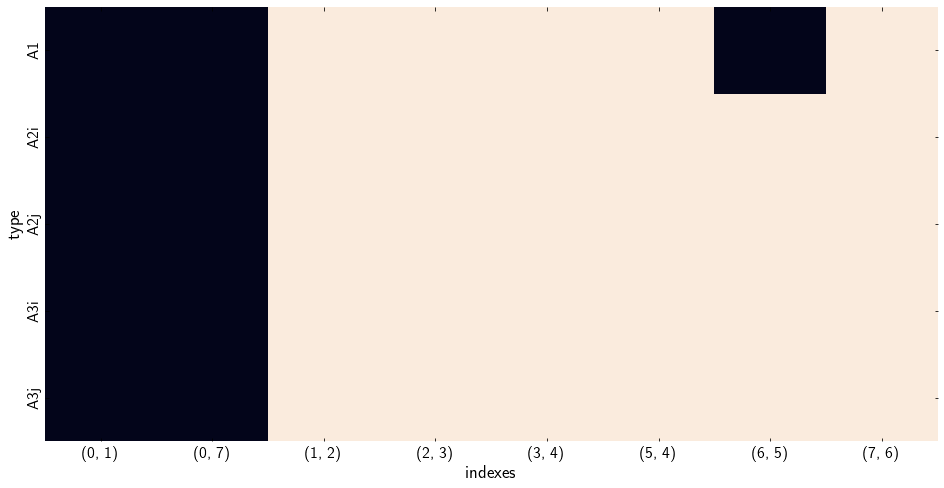

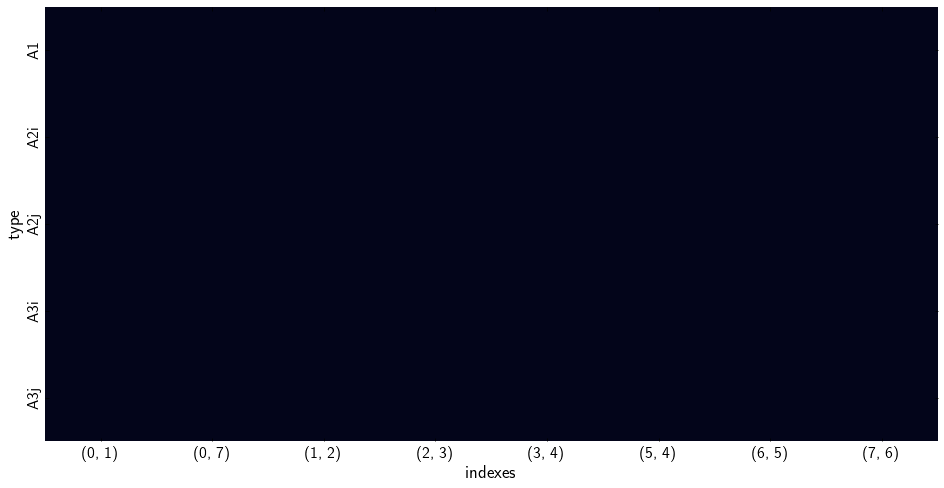

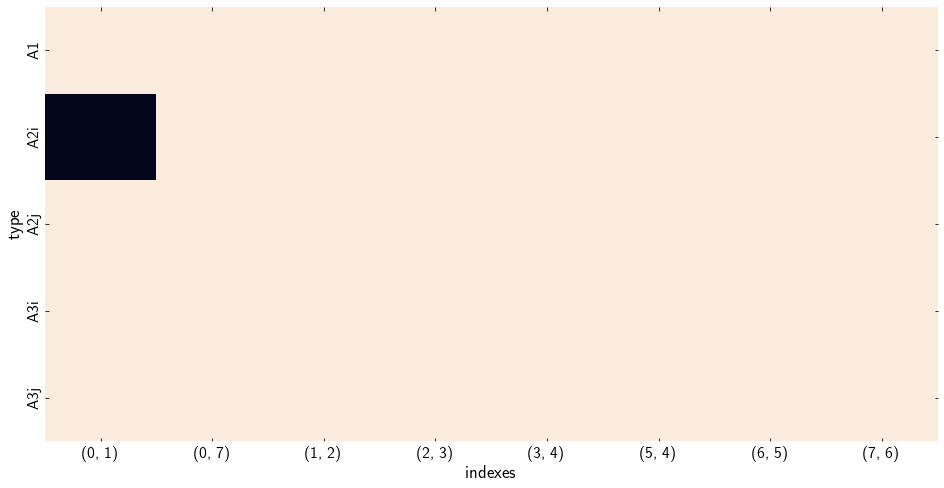

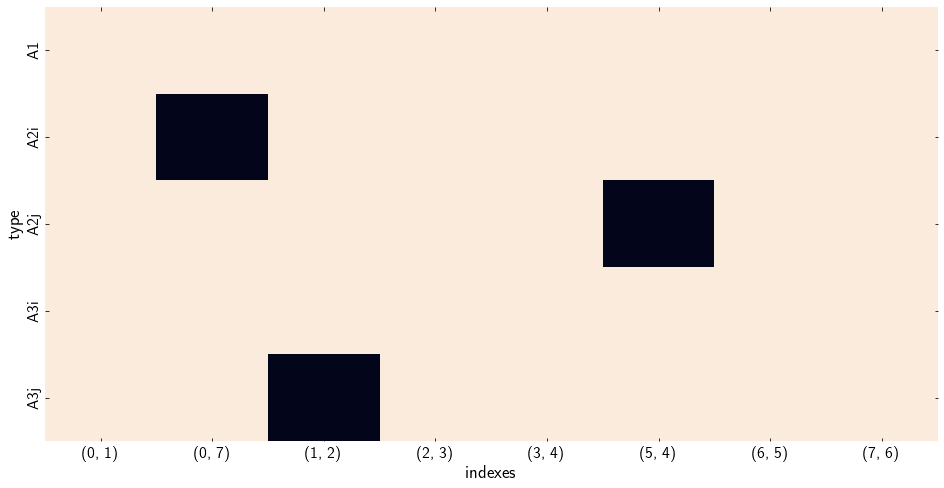

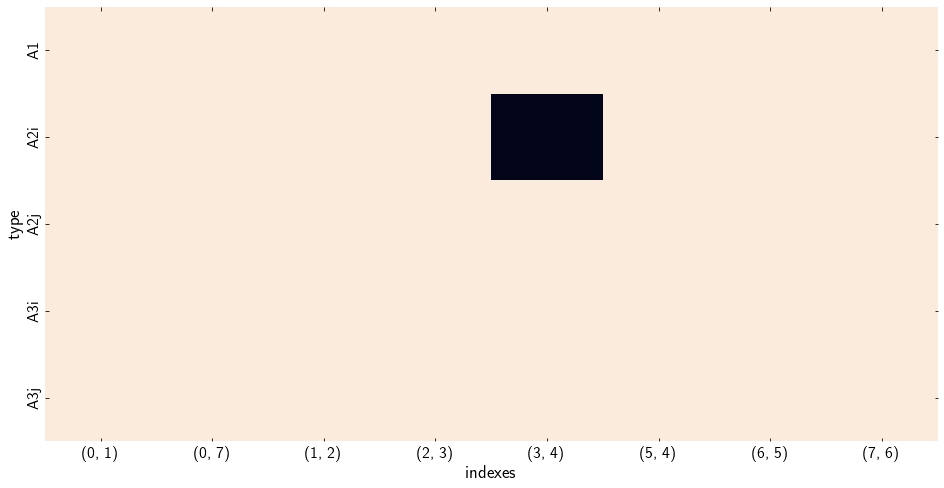

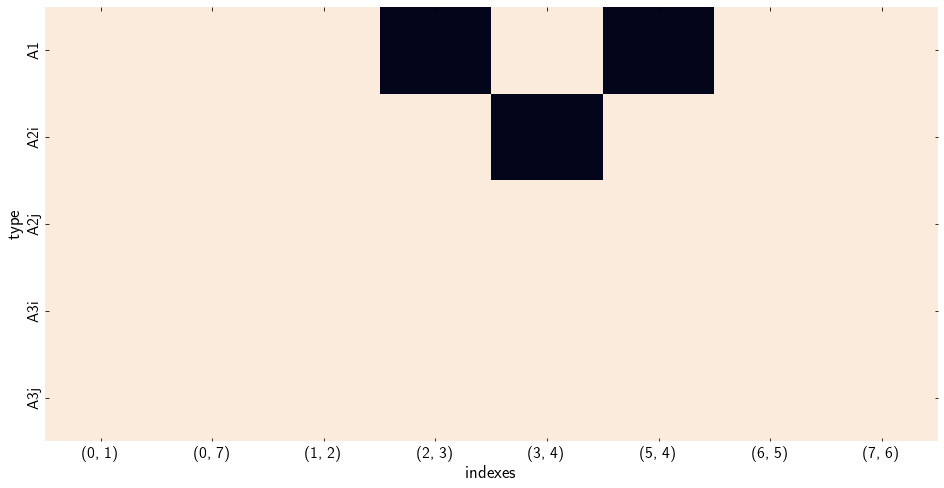

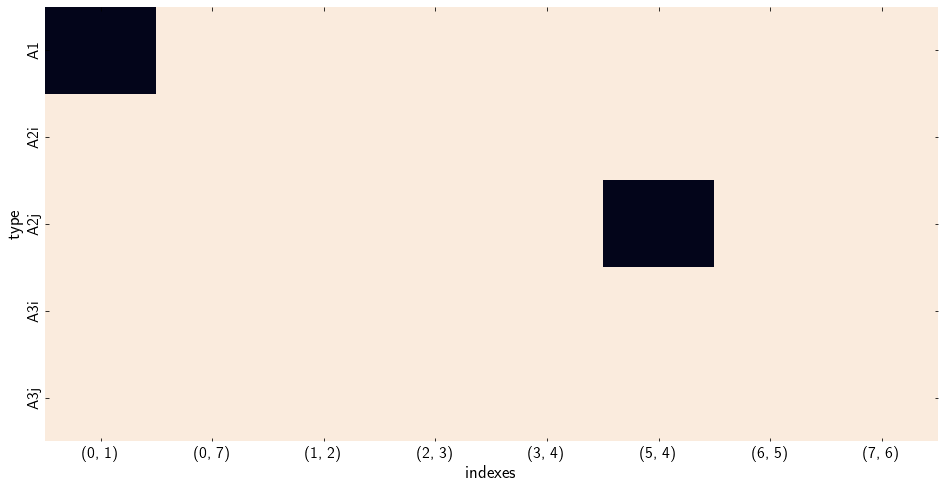

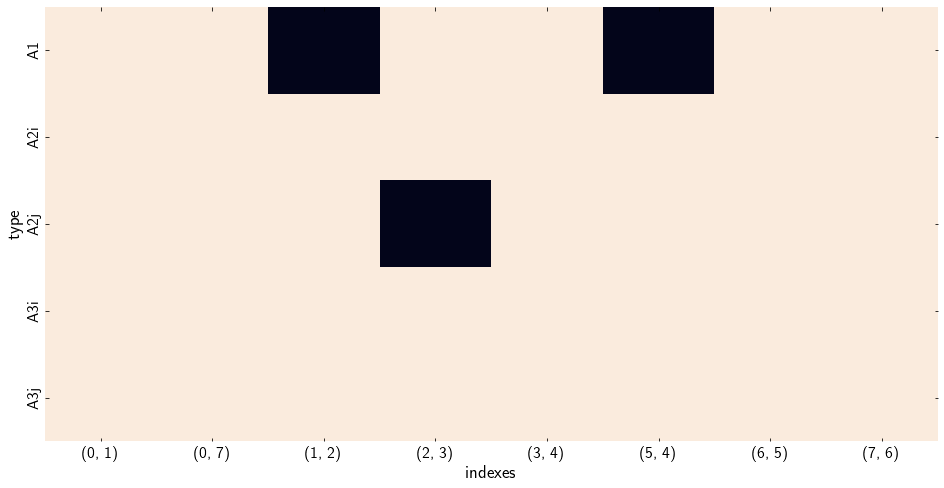

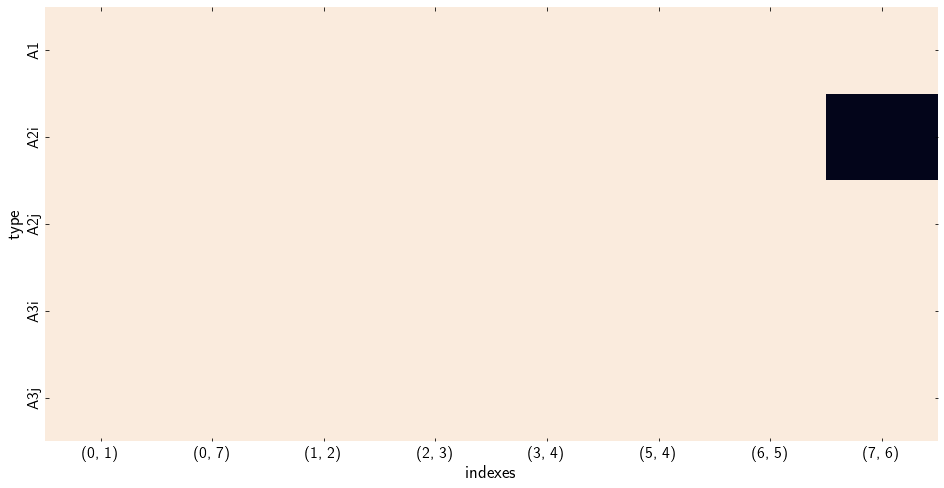

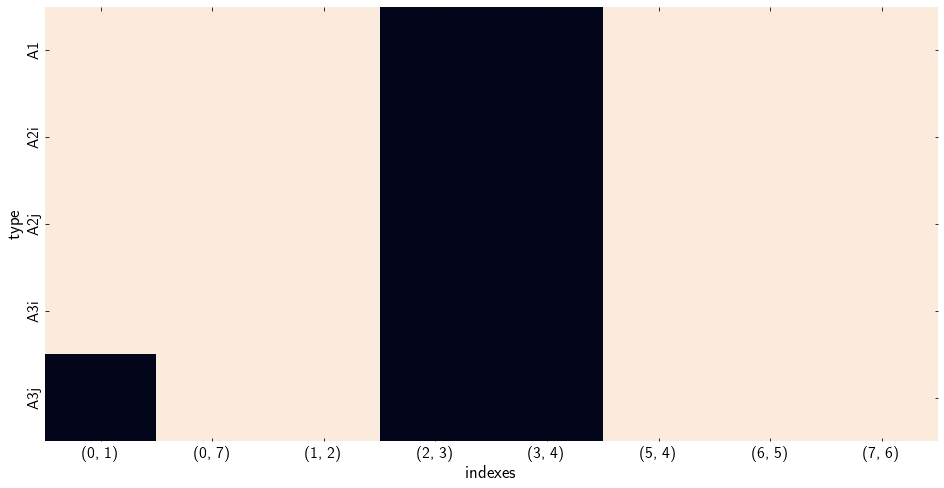

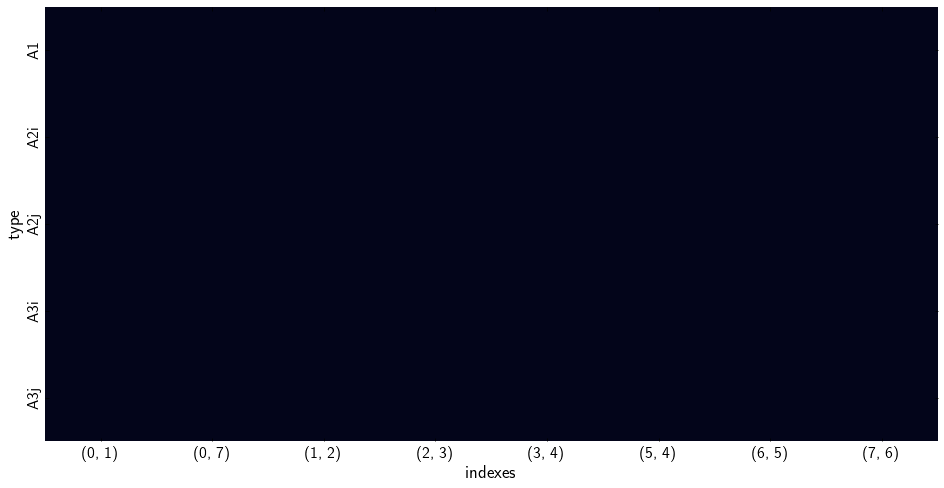

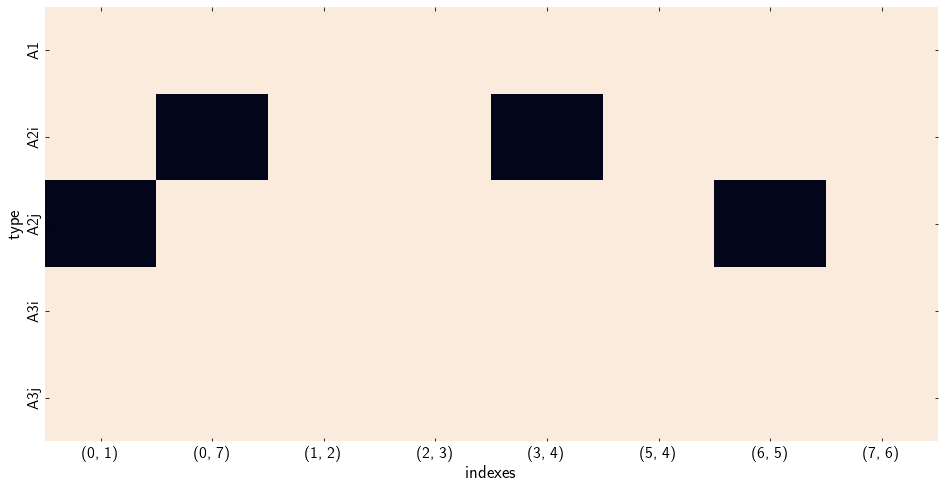

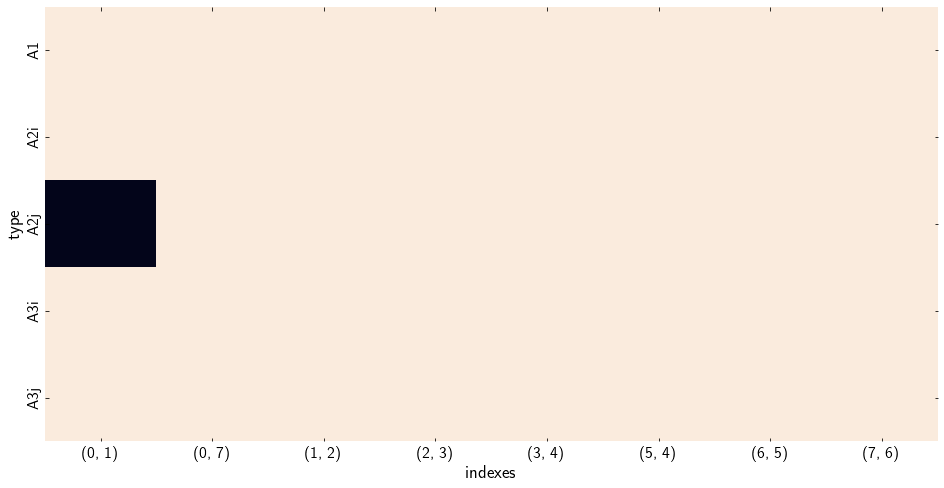

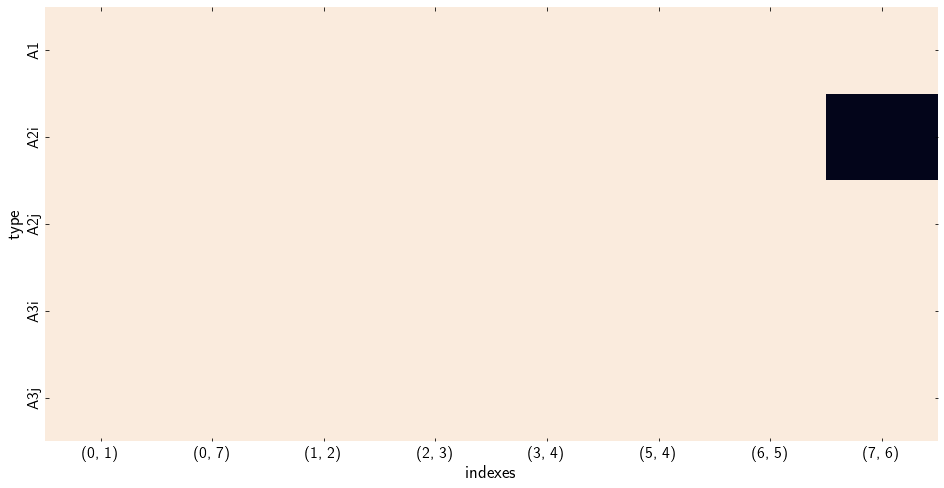

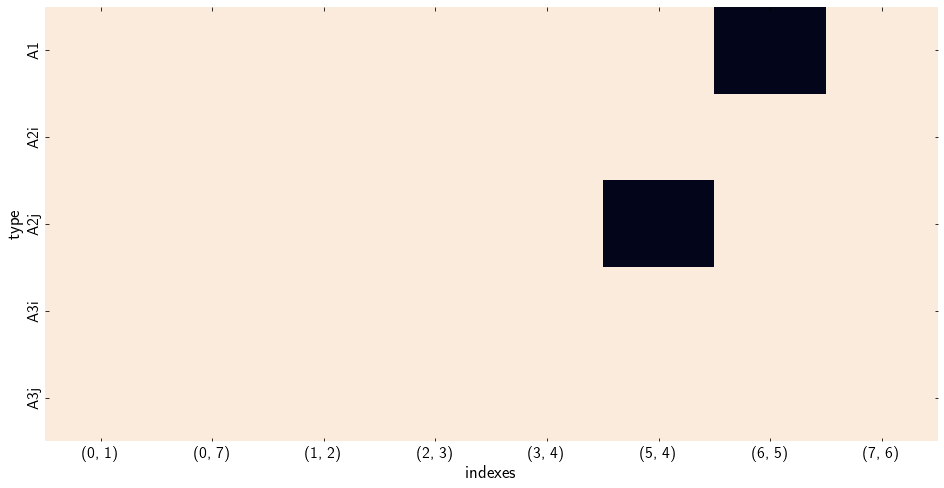

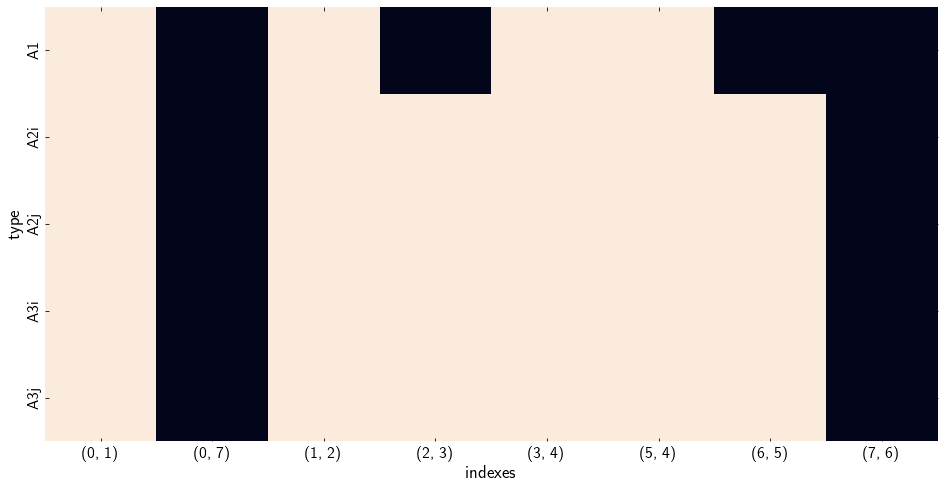

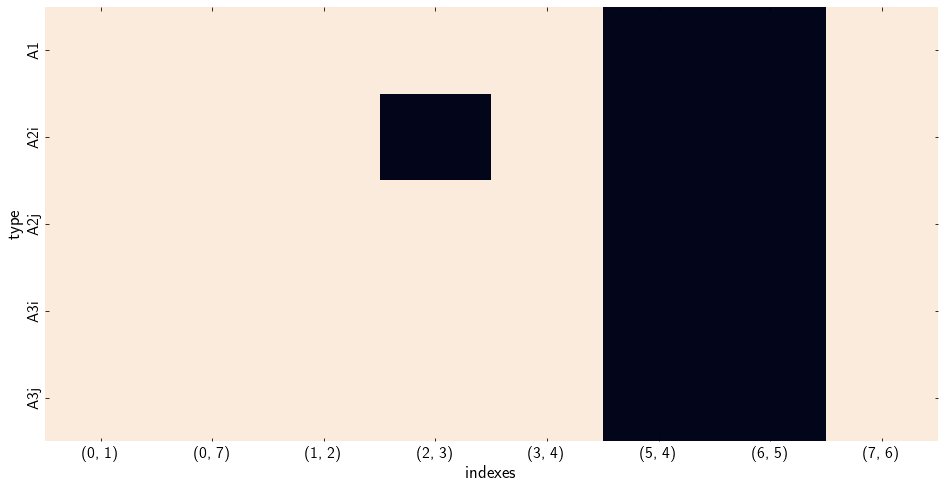

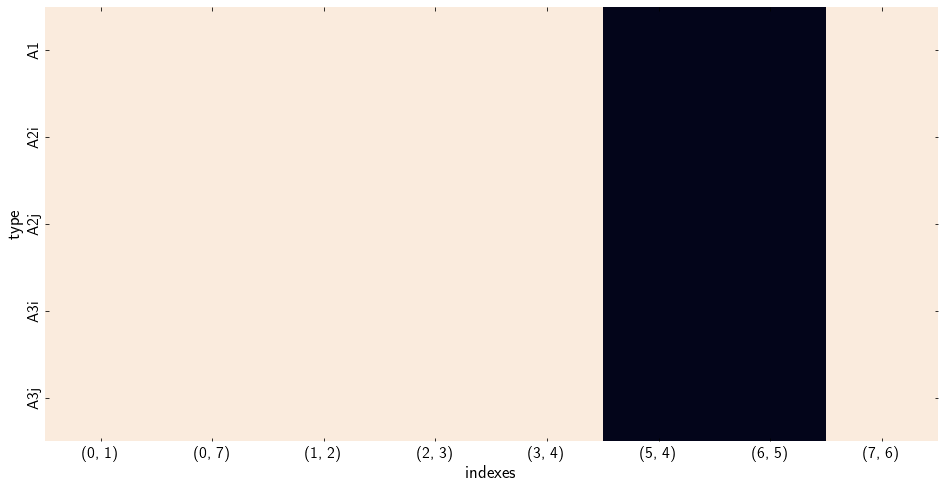

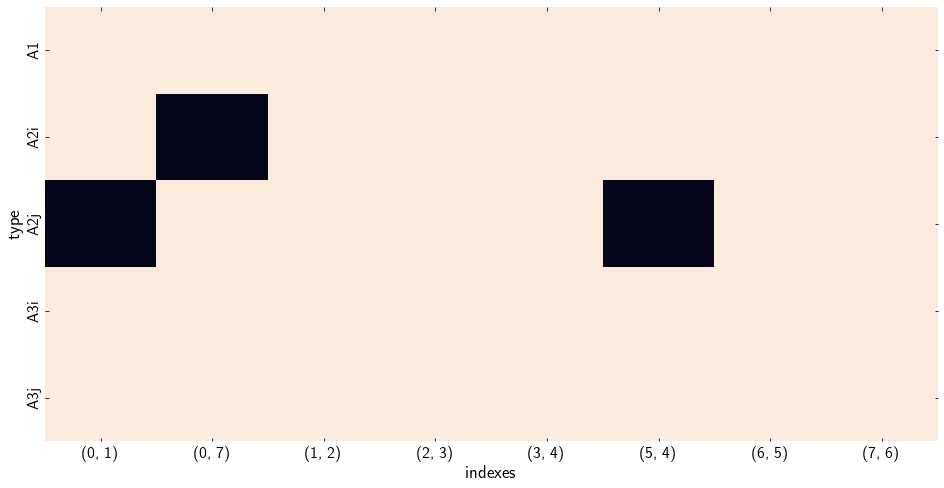

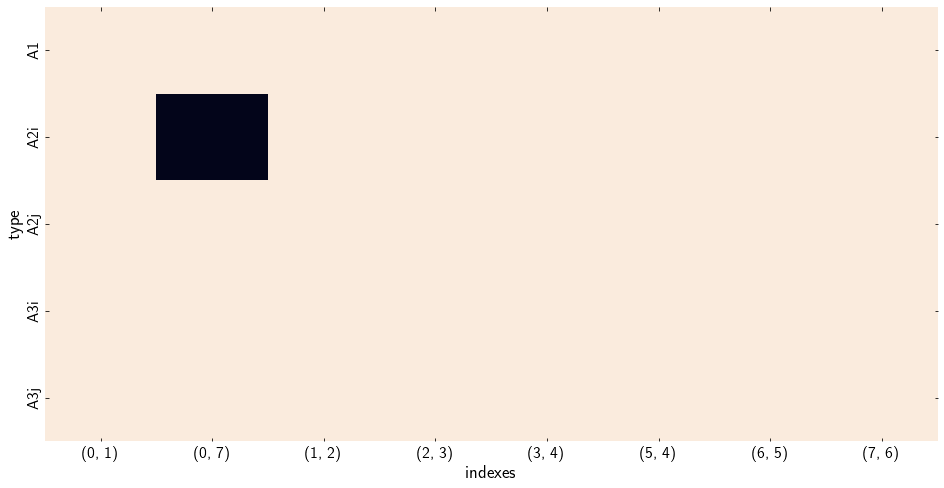

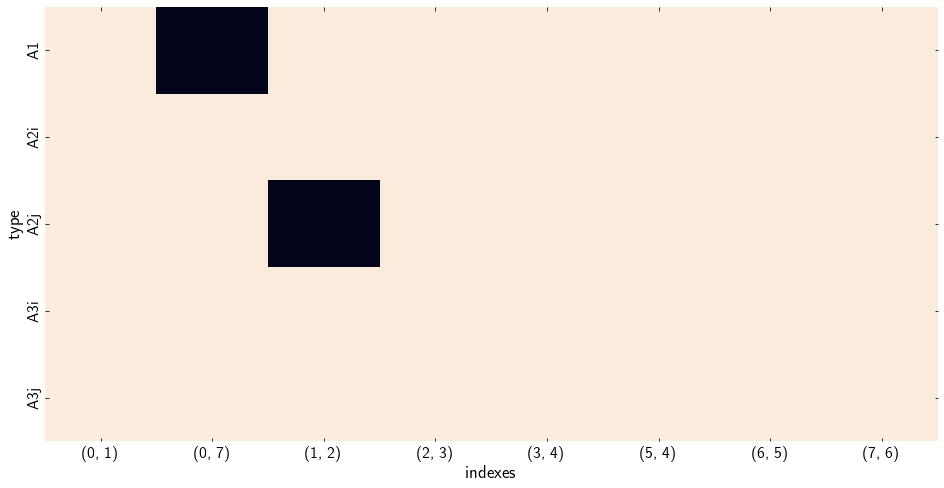

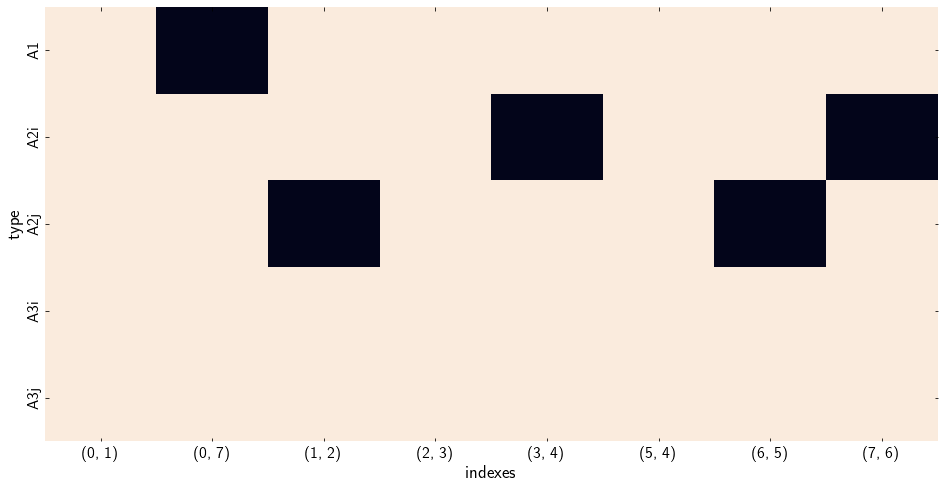

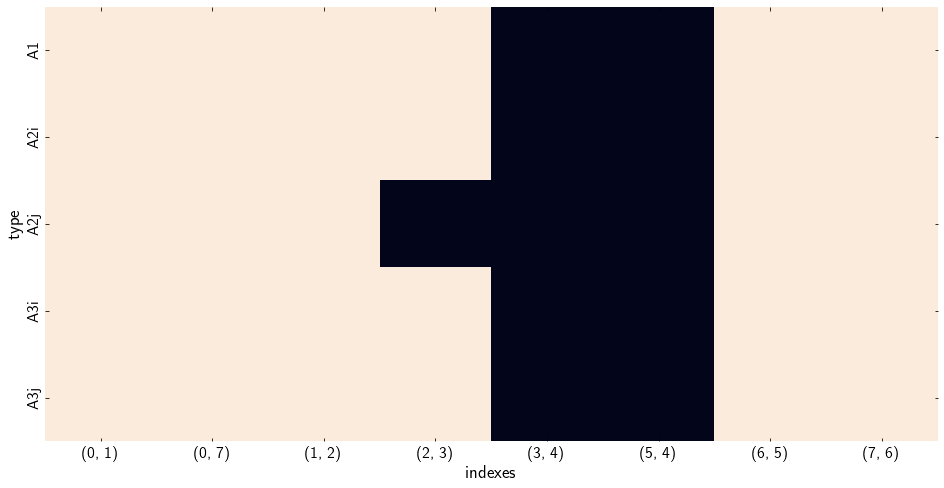

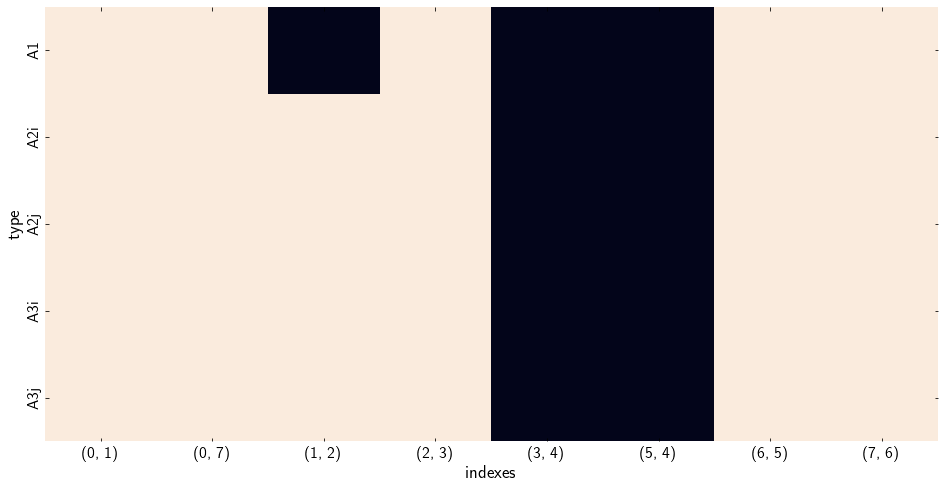

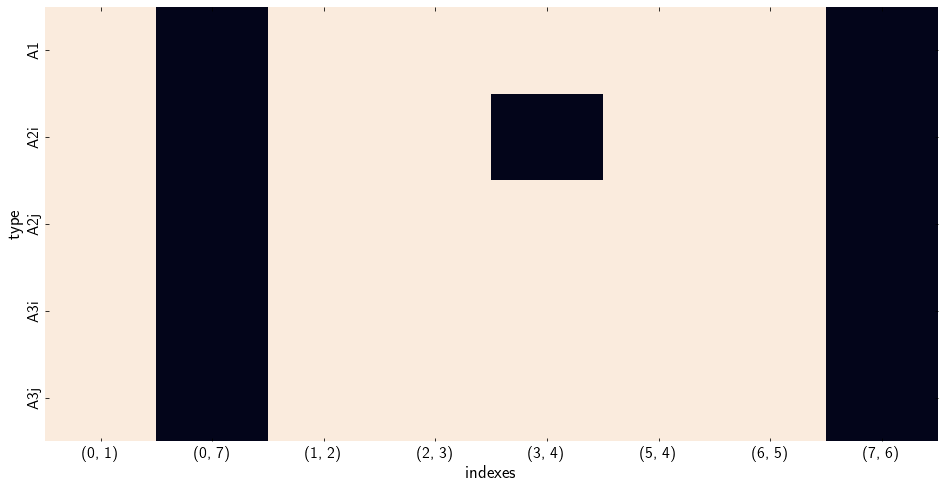

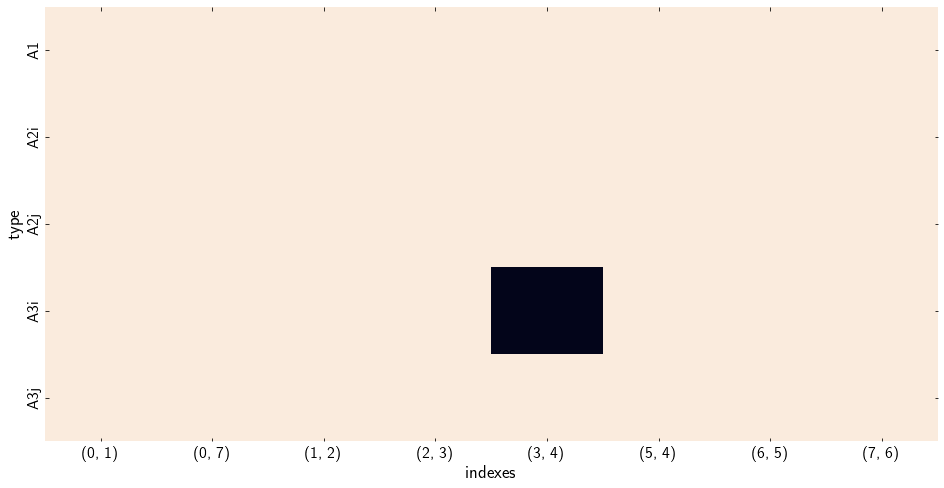

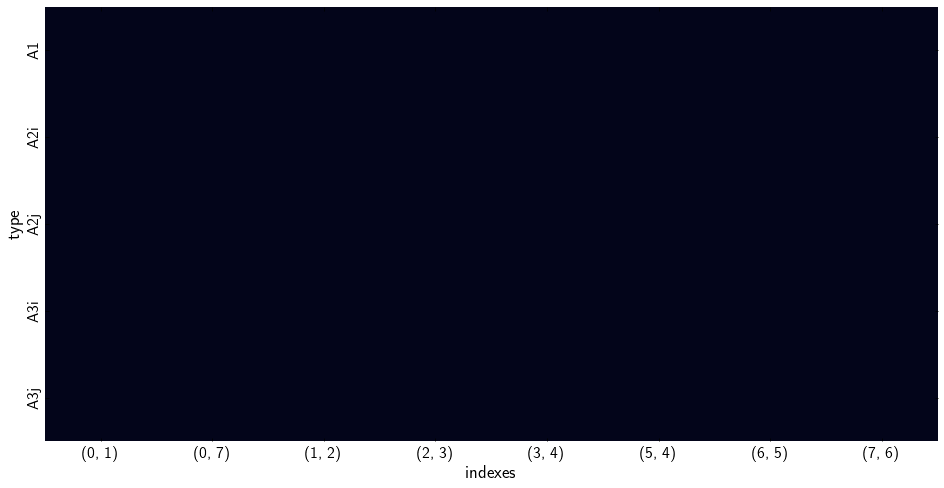

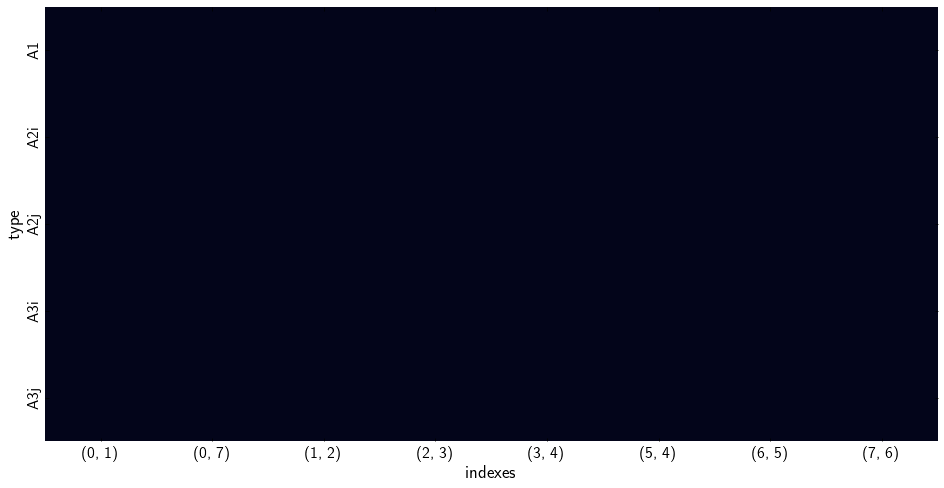

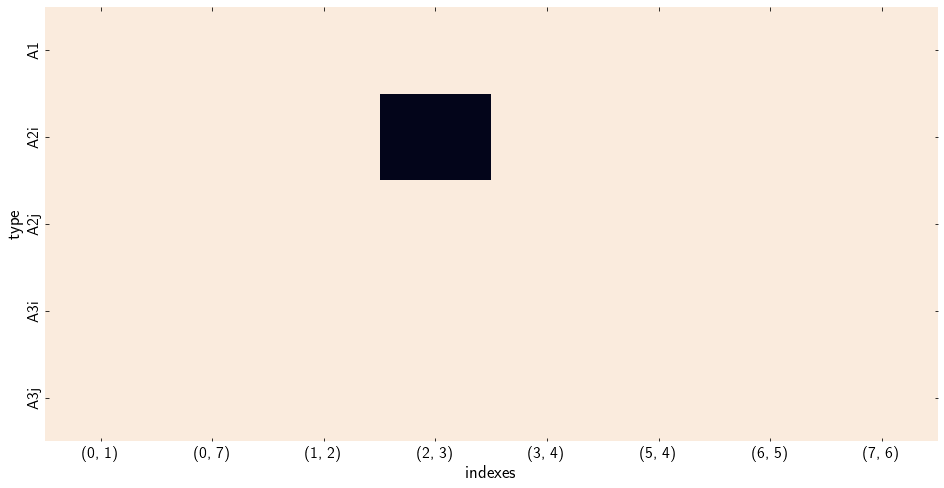

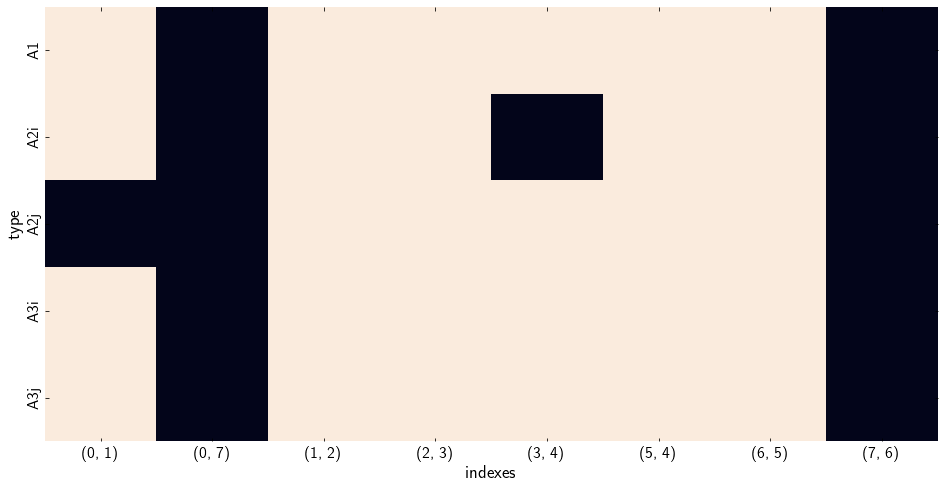

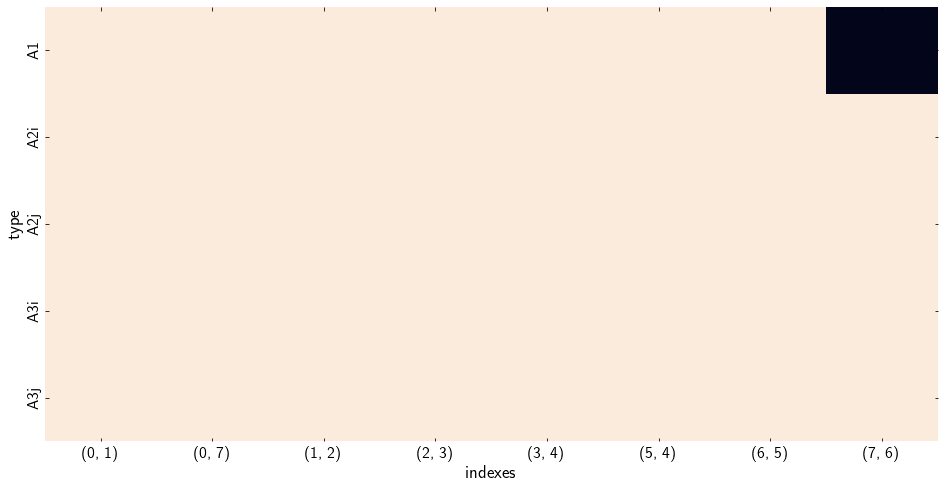

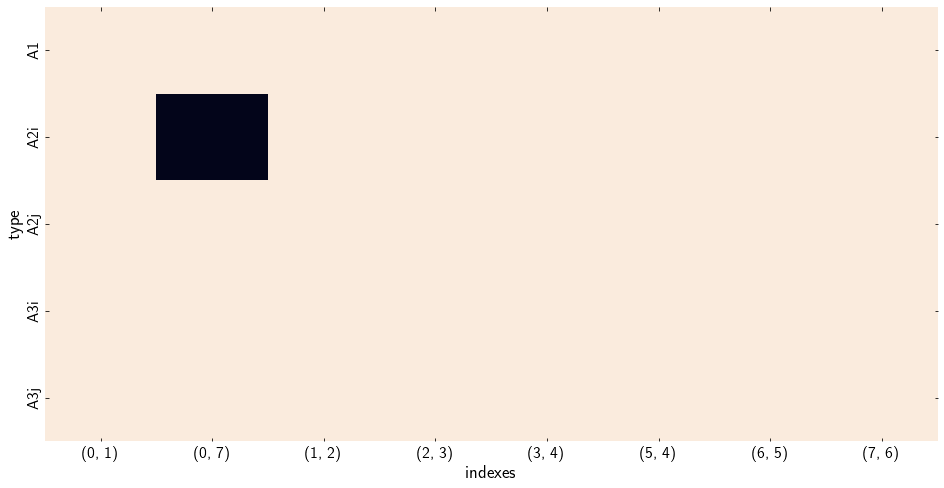

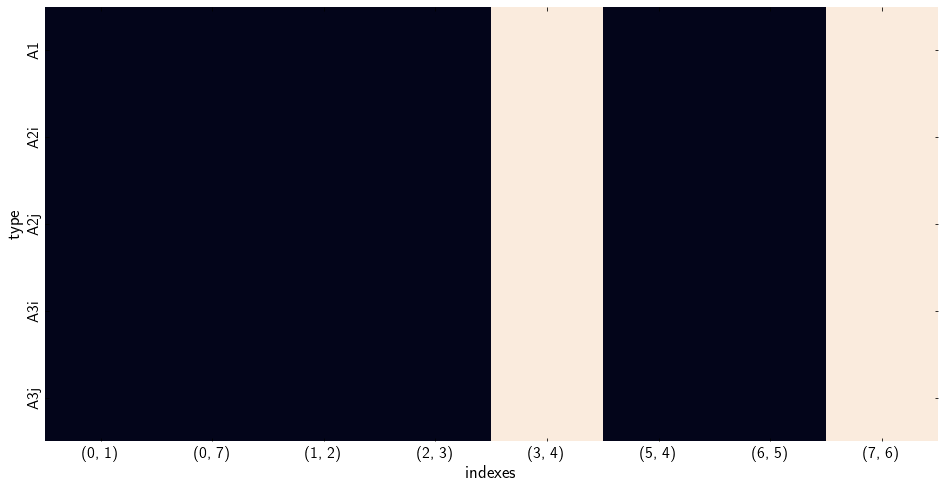

In [14]:
for i, j in itertools.product(range(1, 9), repeat=2):


    device = col_df[col_df.name==f"X{i:02}Y{j:02}"]
    table = device.pivot(index="type", columns="indexes", values="value")

    fig, ax = plt.subplots(figsize = (16, 8))
    sns.heatmap(table, annot=False, ax=ax, cbar=False)
    # ax.set_xticklabels([f"Q{i}" for i in range(8)], ha='center')
    # ax.set_yticklabels(table.index, va="center")

In [61]:
devicef"X{i:02}Y{j:02}"

SyntaxError: invalid syntax (<ipython-input-61-f6d69255e380>, line 1)

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True, False,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])